# Part II - (Borrowers attributes on loan payment)
## by (Ampong Boadu)

## Investigation Overview


> The focal point of the analysis is to determine the effects of borrowers characters and other loan features on the loan status, or on the repayment of the loans. The Annual Percentage Rate of the borrowers and loan status are very key to bring discover the necessary trends. 


## Dataset Overview

> The dataset consist of 83269 data in 18 columns wrangled from prosper loan dataset in the first part of these analysis. General characters of both the loan and borrowers were extracted and reformatted for ease of analysis. Features of the loan includes the current status of the loan, the amount disbursed, the monthly repayment amount, the duration of the loan, the date of disbursement and closure of the loan, and the loan purpose. Some features of the borrowers includes the Annual Percentage Rate (APR), the borrowers rate, income range of the borrower, prosper rating and score on the borrower amoung others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('prosper_loans_clean.csv')
df.shape

(83269, 18)

In [3]:
# convert income range and ratings into ordered categorical types

ordinal_var_dict = {'income_range': ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                    'prosper_rating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'status': ['Current', 'Completed', 'Past Due (1-15 days)','Past Due (16-30 days)',
                               'Past Due (31-60 days)','Past Due (61-90 days)', 'Past Due (91-120 days)',
                               'Past Due (>120 days)', 'Chargedoff', 'Defaulted']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## General Loan Status Distribution and Past Due Loans

> As usual, heavy share of the loans were still active (current status). There were noticable number of the loans written off (chargedoff status) and some defaulted loans as well. Past dues looks minimal and zoom in the chart to the right.

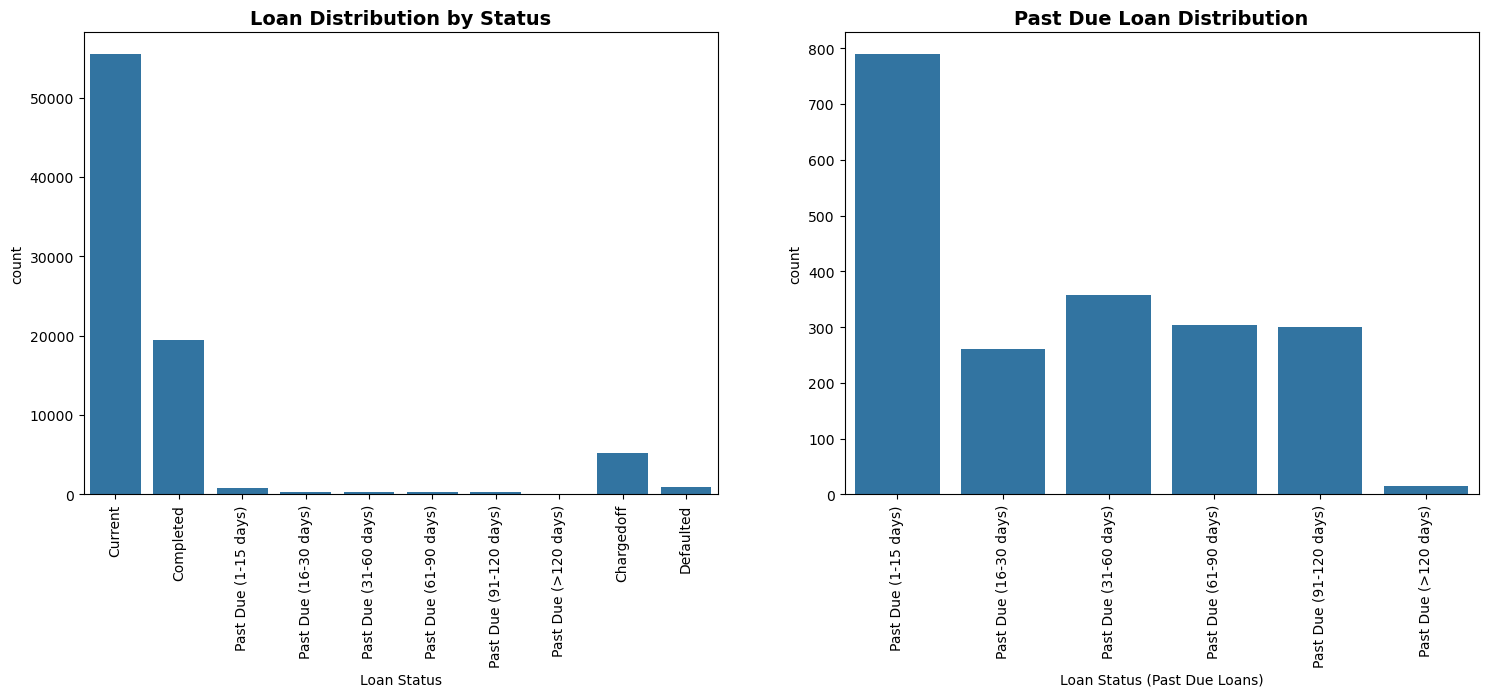

In [4]:
plt.figure(figsize = [18,6])

default_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.countplot(data = df, x = 'status', color = default_color);
plt.xlabel('Loan Status');
plt.xticks(rotation = 90);
plt.title('Loan Distribution by Status', fontsize = 14, weight = 'bold');

plt.subplot(1, 2, 2)
order = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
         'Past Due (91-120 days)','Past Due (>120 days)'];
sb.countplot(data = df[df.status.str[:8] == 'Past Due'], x = 'status', color = default_color, order = order);
plt.xlabel('Loan Status (Past Due Loans)');
plt.xticks(rotation = 90);
plt.title('Past Due Loan Distribution', fontsize = 14, weight = 'bold');

## Loan Status against Annual Percentage Rate of Borrowers.

> Loans with history of default whether active or closed exibit high Annual Percentage Rate (APR). Loan with status Chargedoff and Defaulted shows the highest median of APR followed by loans in the Past Due brackets. It worth noting that loan active (current status) have APR concentration below their median APR.

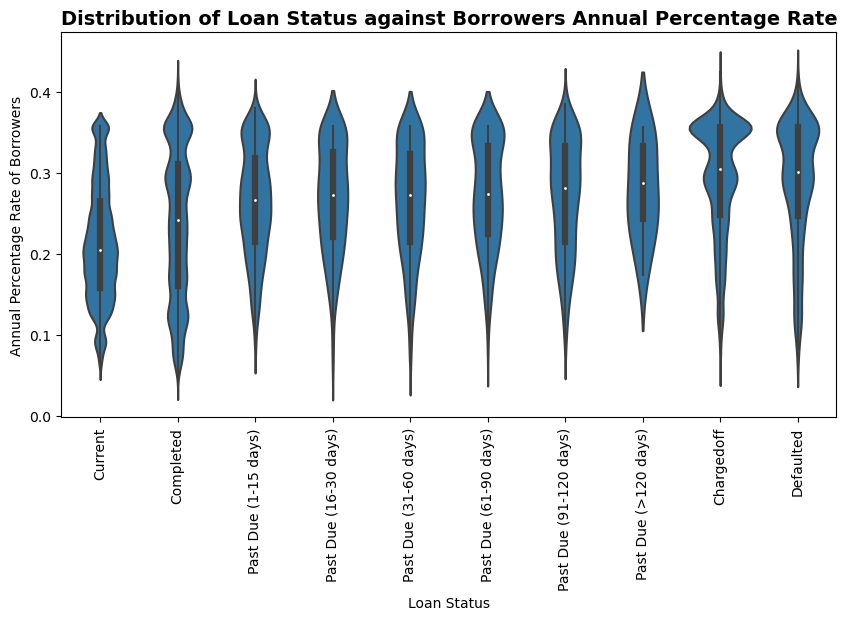

In [5]:
plt.figure(figsize = [10,5])
sb.violinplot(data = df, x = 'status', y = 'borrower_APR', color = default_color);
plt.ylabel('Annual Percentage Rate of Borrowers');
plt.xlabel('Loan Status');
plt.xticks(rotation = 90);
plt.title('Distribution of Loan Status against Borrowers Annual Percentage Rate', fontsize = 14, weight = 'bold');

## Borrowers APR comparism between Completed and Written Off Loans
> The distribution of both Completed and Chargedoff loans appear bimodal, but Completed loans distribution was positively skewed whilst the Chargedoff was negatively skewed. The interesting thing about the distribution is the close match up of Chargedoff loans to Completed loans where APR is high even higher than completed loans at 0.35.

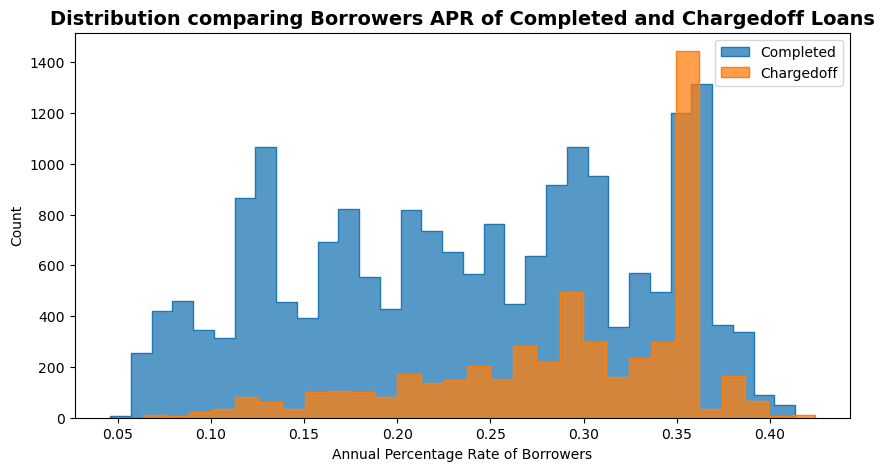

In [6]:
done = df.status == 'Completed'
writeoff = df.status == 'Chargedoff'
color = sb.color_palette()[1]

plt.figure(figsize = [10,5])
sb.histplot((df['borrower_APR'][done]), kde=False, label = 'Completed', element = 'step')
sb.histplot((df['borrower_APR'][writeoff]), kde=False, label = 'Chargedoff', element = 'step', color = color)
plt.xlabel('Annual Percentage Rate of Borrowers')
plt.ylabel('Count')
plt.title('Distribution comparing Borrowers APR of Completed and Chargedoff Loans', fontsize = 14, weight = 'bold')
plt.legend();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt